# EDA for CHGH dataset

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Setup Environment

In [2]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/eda/CHGH

# install dependents
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg/eda/CHGH
     |████████████████████████████████| 1.2 MB 4.6 MB/s 
     |████████████████████████████████| 41 kB 412 kB/s 


## Import Library

In [43]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

from monai.data import CacheDataset, DatasetSummary, DataLoader
from monai.transforms import (
    AddChanneld,
    Compose,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
    ToTensord
)
from monai.utils import first

import matplotlib.pyplot as plt
import pandas as pd

from data_utils.chgh_dataset import get_data_dicts
from data_utils.visualization import show_img_lbl
from data_utils.utils import get_data_info

## Prepare data dicts

In [4]:
data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2'

In [5]:
data_dicts = get_data_dicts(data_dir)

## Show data info

pid: pid_110
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset_2/pid_110/pid_110.nii.gz
img shape: [512, 512, 366]
img spacing: [0.37890625, 0.37890625, 0.4]
lbl shape: [512, 512, 366]
lbl spacing: [0.37890625, 0.37890625, 0.4]
lbl ids: [0. 1.]


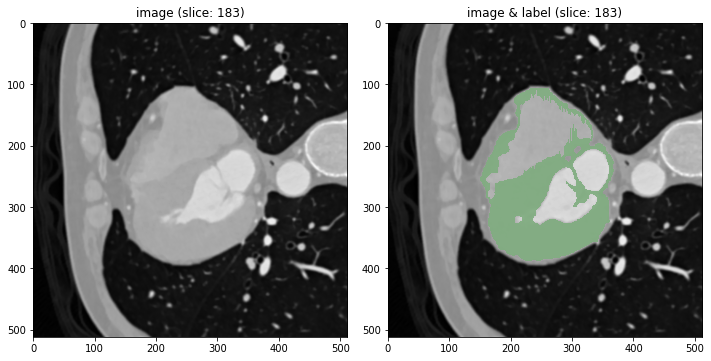

KeyboardInterrupt: ignored

In [ ]:
data_info_df = get_data_info(data_dicts[-4:])

In [ ]:
data_info_df

pid        img_shape                      img_space        lbl_shape  \
0    pid_06  [512, 512, 233]  [0.33984375, 0.33984375, 0.5]  [512, 512, 233]   
1    pid_08  [512, 512, 341]  [0.38085938, 0.38085938, 0.5]  [512, 512, 341]   
2    pid_27  [512, 512, 331]    [0.3828125, 0.3828125, 0.5]  [512, 512, 331]   
3    pid_57  [512, 512, 411]  [0.47851562, 0.47851562, 0.4]  [512, 512, 411]   
4   pid_106  [512, 512, 403]  [0.42382812, 0.42382812, 0.4]  [512, 512, 403]   
5   pid_107  [512, 512, 376]  [0.33203125, 0.33203125, 0.4]  [512, 512, 376]   
6   pid_108  [512, 512, 267]    [0.3359375, 0.3359375, 0.5]  [512, 512, 267]   
7   pid_110  [512, 512, 366]  [0.37890625, 0.37890625, 0.4]  [512, 512, 366]   
8  pid_1000  [512, 512, 357]  [0.36914062, 0.36914062, 0.4]  [512, 512, 357]   
9  pid_1001  [512, 512, 347]        [0.34375, 0.34375, 0.4]  [512, 512, 347]   

                       lbl_space     lbl_ids  
0  [0.33984375, 0.33984375, 0.5]  [0.0, 1.0]  
1  [0.38085938, 0.38085938, 0.5]  [0.0, 1.0]  
2    [0.3828125, 0.3828125, 0.5]  [0.0, 1.0]  
3  [0.47851562, 0.47851562, 0.4]  [0.0, 1.0]  
4  [0.42382812, 0.42382812, 0.4]  [0.0, 1.0]  
5  [0.33203125, 0.33203125, 0.4]  [0.0, 1.0]  
6    [0.3359375, 0.3359375, 0.5]  [0.0, 1.0]  
7  [0.37890625, 0.37890625, 0.4]  [0.0, 1.0]  
8  [0.36914062, 0.36914062, 0.4]  [0.0, 1.0]  
9        [0.34375, 0.34375, 0.4]  [0.0, 1.0]

In [ ]:
data_shape_df = pd.DataFrame(data_info_df['img_shape'].to_list(), columns=['w', 'h', 's'])
data_shape_df.mean()

w    512.0
h    512.0
s    343.2
dtype: float64

In [ ]:
data_space_df = pd.DataFrame(data_info_df['img_space'].to_list(), columns=['x', 'y', 'z'])
data_space_df.mean()

x    0.376563
y    0.376563
z    0.440000
dtype: float32

## Statcics

In [6]:
base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])

ds = CacheDataset(
    data=data_dicts,
    transform=base_tf
)

/usr/local/lib/python3.8/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 10/10 [01:35<00:00,  9.53s/it]


In [7]:
# ref: https://arxiv.org/pdf/1904.08128.pdf
s = DatasetSummary(ds)
s.calculate_percentiles()
s.calculate_statistics()
data_target_space = s.get_target_spacing()

In [8]:
print('data target space:')
data_target_space

data target space:


(0.380859375, 0.380859375, 0.45000000298023224)

In [9]:
print('data intensities statcics:')
data_intensities_statcics = pd.DataFrame(
    [[s.data_min, s.data_median, s.data_max, s.data_mean, s.data_std, s.data_min_percentile, s.data_max_percentile]],
    columns=['min', 'med', 'max', 'mean', 'std', 'min_percentile (0.5%)', 'max_percentile (99.5%)']
)
data_intensities_statcics

data intensities statcics:


min    med     max        mean        std  min_percentile (0.5%)  \
0 -903.0  114.0  2483.0  127.306755  77.372528                  -43.0   

   max_percentile (99.5%)  
0                   416.0

## utils

In [88]:
from pathlib import PurePath

from tqdm import tqdm
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300


def get_slicer_cmap(num_classes):
    '''get 3d slicer cmap (7 label for cardiac)'''
    colorarray = [
        [128 / 256, 174 / 256, 128 / 256, 1],
        [241 / 256, 214 / 256, 145 / 256, 1],
        [177 / 256, 122 / 256, 101 / 256, 1],
        [111 / 256, 184 / 256, 210 / 256, 1],
        [216 / 256, 101 / 256, 79 / 256, 1],
        [221 / 256, 130 / 256, 101 / 256, 1],
        [144 / 256, 238 / 256, 144 / 256, 1],
    ]
    return ListedColormap(colorarray[:num_classes])


def get_data(files, transform):
    ds = CacheDataset(
        data=files,
        transform=transform,
        num_workers=2
    )
    return ds


def show_data(data, alpha=0.5):
    num_classes = 2
    col_num = 2
    row_num = len(data_dicts)

    plt.figure("check", (10,5*row_num))
    subplot_idx = 1
    for d in data:
        # get pid
        pid = PurePath(d['image_meta_dict']['filename_or_obj']).parts[-1].split('.')[0]

        # get img and lbl
        slice_idx = d['image'].shape[-1]//2
        img = d['image'][0,:,:,slice_idx]
        lbl = d['label'][0,:,:,slice_idx]
        lbl_msk = np.ma.masked_where(lbl == 0, lbl)

        # show img
        plt.subplot(row_num, col_num, subplot_idx)
        plt.title(f"{pid} (slice: {slice_idx})")
        plt.imshow(img, cmap='gray')
        # update subplot idx
        subplot_idx+=1

        # show img with lbl
        plt.subplot(row_num, col_num, subplot_idx)
        plt.title(f"{pid} (slice: {slice_idx})")
        plt.imshow(img, cmap='gray')
        plt.imshow(
            lbl_msk,
            get_slicer_cmap(num_classes),
            interpolation='none',
            alpha=alpha,
            vmin=1,
            vmax=num_classes
        )
        # update subplot idx
        subplot_idx+=1

    plt.tight_layout()
    plt.show()

## Transform

In [25]:
space = [0.7,0.7,1.0]
a_min = -175
a_max = 250
transform = Compose(
      [
          LoadImaged(keys=["image", "label"]),
          AddChanneld(keys=["image", "label"]),
          Orientationd(keys=["image", "label"], axcodes="RAS"),
          Spacingd(
              keys=["image", "label"],
              pixdim=space,
              mode=("bilinear", "nearest"),
          ),
          ScaleIntensityRanged(
              keys=["image"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True
          ),
          ToTensord(keys=["image", "label"])
      ]
  )

/usr/local/lib/python3.8/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


In [47]:
data = get_data(data_dicts, transform)

Loading dataset: 100%|██████████| 10/10 [01:06<00:00,  6.60s/it]


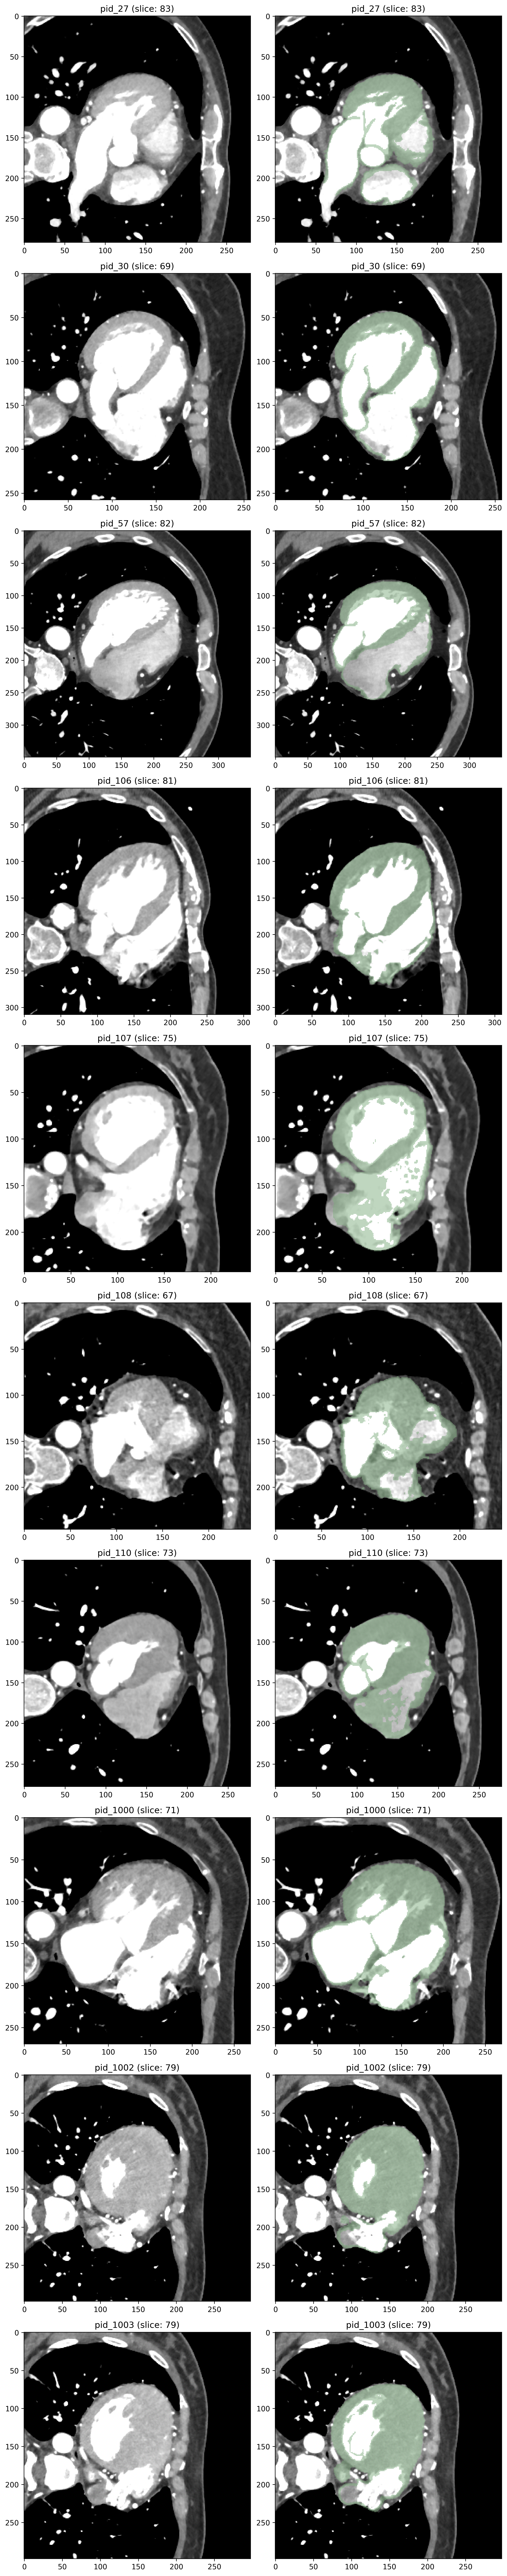

In [89]:
show_data(data)

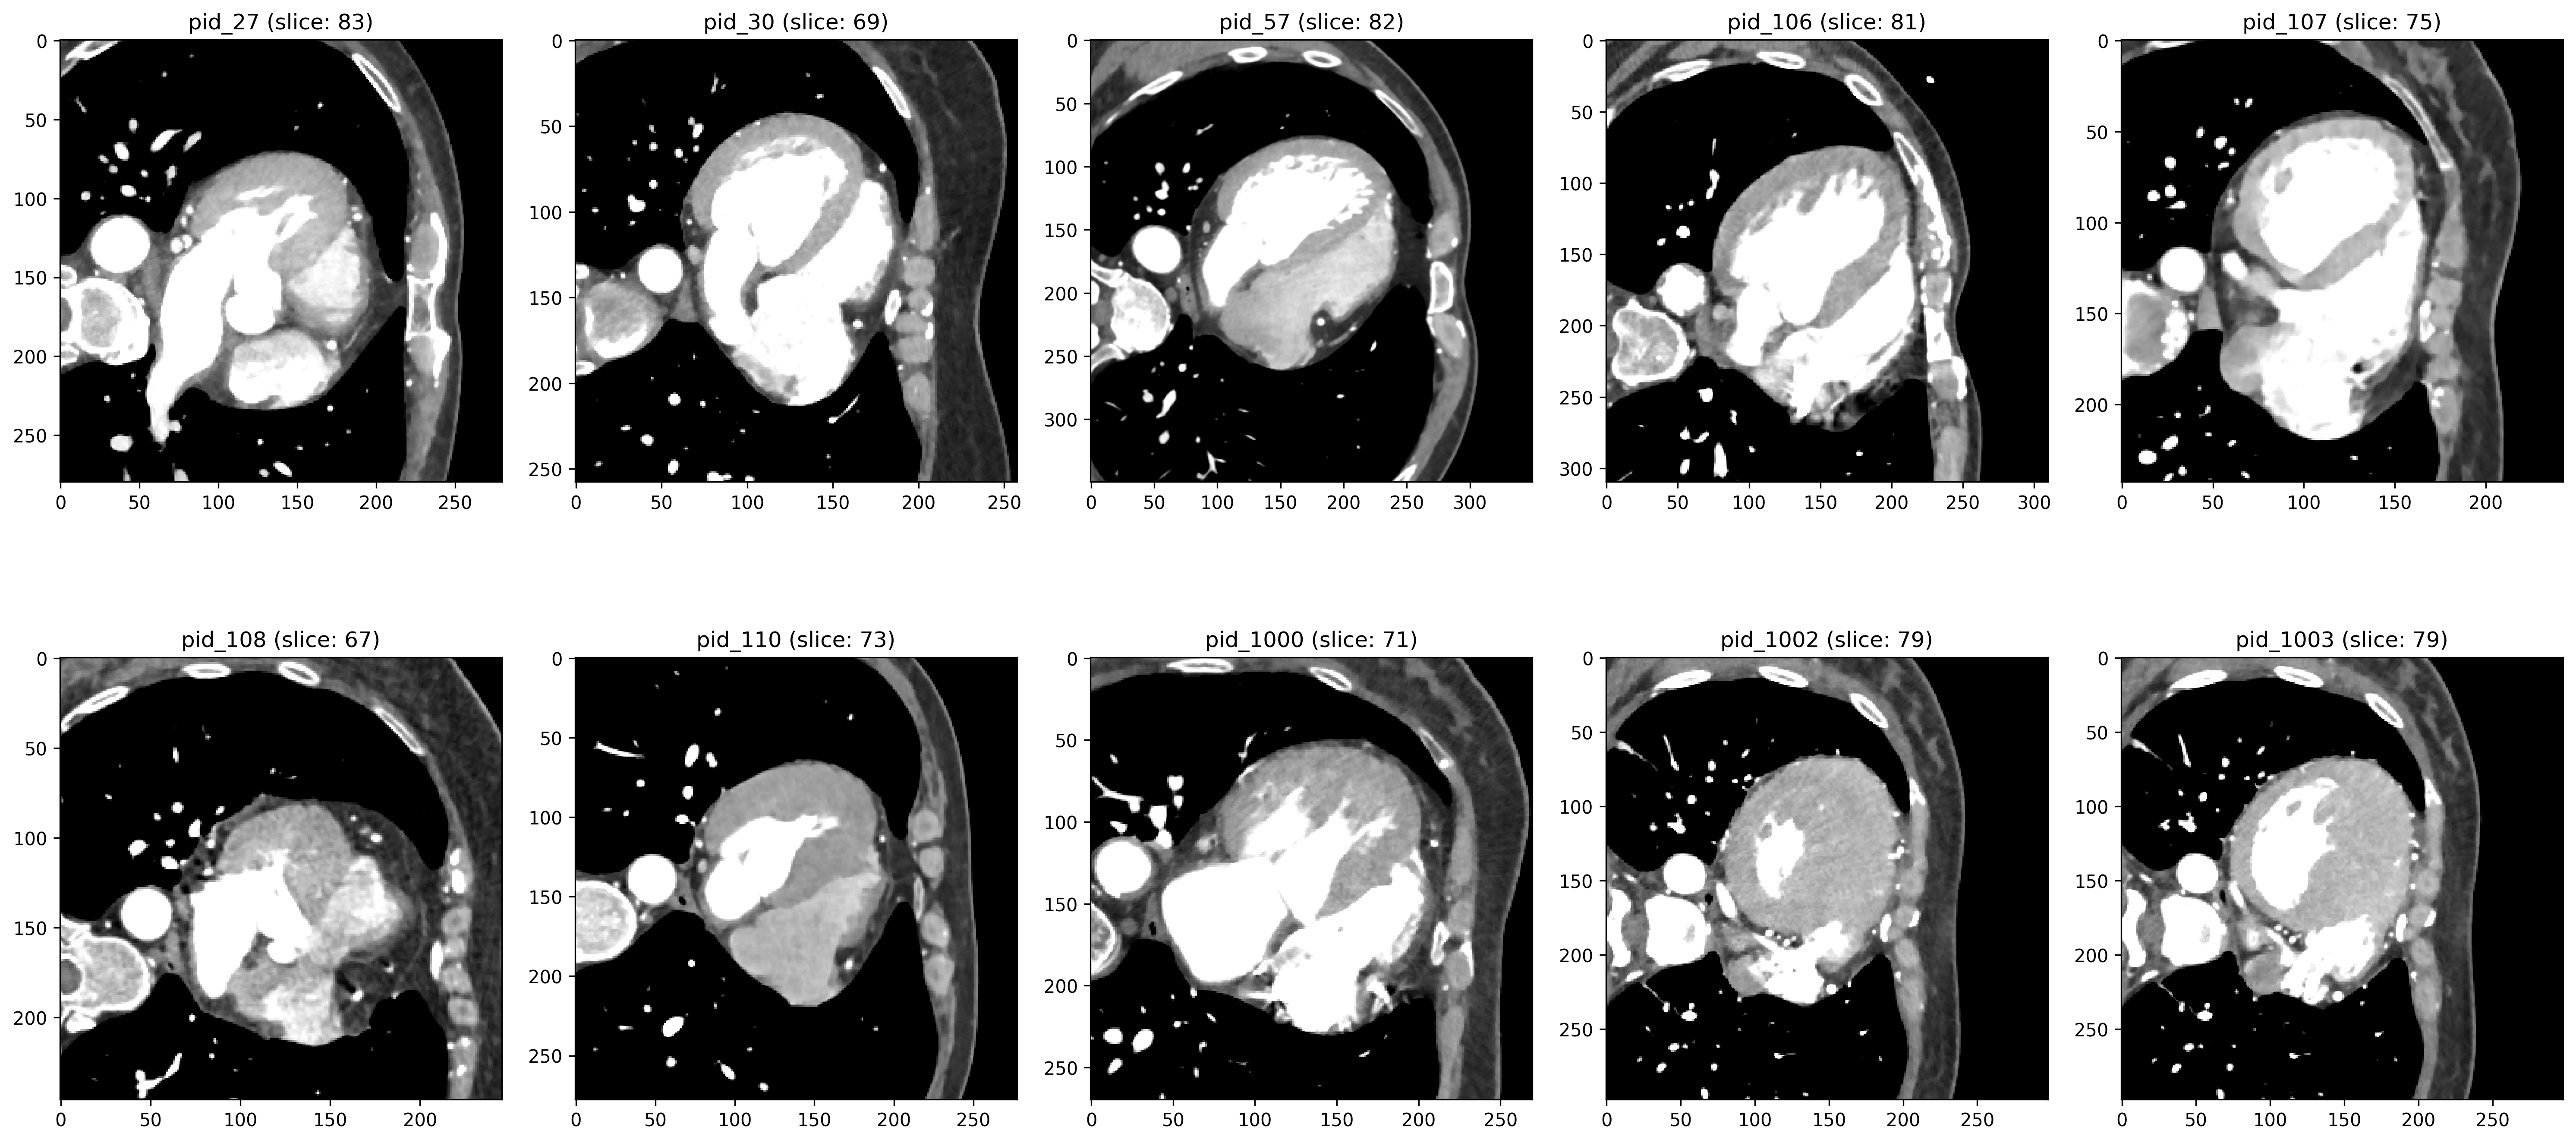

In [80]:
show_data(data, alpha=0)